## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



#Nome: Thais carvalho spinoza
#Rm: 95546
#Tuma:2tdsvj
#Ano: 2023


In [80]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

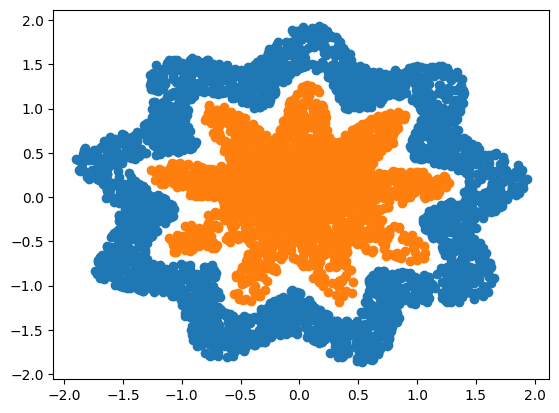

In [69]:
## coloque seu RM aqui!!
RM = [9,5,5,4,6]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [70]:
###### Seu desafio começa aqui.......

#Importando as bibliotecas
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense







In [71]:
#Criando o conjunto de dados de entrada e saída
X = np.concatenate((c1, c2))



#criando um conjunto de rotulos onde os primeiros c1 corresponde a zero e o c2 corresponde a um.
y = np.concatenate((np.zeros(nData), np.ones(nData)))

In [72]:
#Dividindo o conjunto de dados em treinamento de teste separando 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
#Criando o modelo MLP com 4 camadas
#com 113 neuronios trabalhando
model = Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
#Treinando o modelo utilizando o conjunto de dados do treinamento
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 2/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9987
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9998
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9991
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9998
Epoch 7/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 8/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 10/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0021 - accura

In [79]:
#Avaliação do modelo
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

37/37 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9991
Test loss: 0.001215512165799737
Test accuracy: 0.9991379380226135
